In [1]:
## minst data set -- handwritte digits imagws --- 0 to 9 digits ke images


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 30s 3us/step


In [4]:
train_images.shape , train_labels.shape

((60000, 28, 28), (60000,))

In [5]:
train_labels[0:8]

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

In [6]:
def images_show(train_images, train_labels, number):
    plt.imshow(train_images[number])
    plt.title(train_labels[number])
    plt.show()

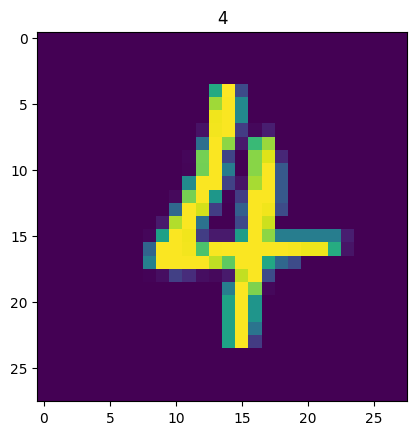

In [7]:
images_show(train_images, train_labels, 292)

In [8]:
## normalise
train_images = train_images /255.0
test_images = test_images / 255.0


In [9]:
## expend dimension
train_images = train_images.reshape((60000, 28 ,28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


In [10]:
## tocategorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
## define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, GlobalMaxPooling2D, Dense, Dropout
from tensorflow.keras.initializers import RandomNormal


input_shape = (28, 28, 1)
num_classes = 10  # update if you're predicting more digits or multi-output

# Model definition
model = Sequential()

# Convolutional blocks
model.add(Conv2D(32, (3, 3), kernel_initializer=RandomNormal(), input_shape=(28, 28, 1)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), kernel_initializer=RandomNormal()))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), kernel_initializer=RandomNormal()))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), kernel_initializer=RandomNormal()))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), kernel_initializer=RandomNormal()))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), kernel_initializer=RandomNormal()))
model.add(Activation('relu'))



model.add(GlobalMaxPooling2D())
model.add (Dense(500))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 18, 18, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 32)             │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │        16,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,070 (265.90 KB)

 Trainable params: 68,070 (265.90 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(test_images, test_labels),
    shuffle=True
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 234s 118ms/step - accuracy: 0.7186 - loss: 0.7754 - val_accuracy: 0.9608 - val_loss: 0.1288
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 264s 141ms/step - accuracy: 0.9604 - loss: 0.1284 - val_accuracy: 0.9651 - val_loss: 0.1070
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 261s 139ms/step - accuracy: 0.9706 - loss: 0.0907 - val_accuracy: 0.9795 - val_loss: 0.0652
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 269s 143ms/step - accuracy: 0.9768 - loss: 0.0757 - val_accuracy: 0.9786 - val_loss: 0.0700
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 226s 120ms/step - accuracy: 0.9812 - loss: 0.0629 - val_accuracy: 0.9808 - val_loss: 0.0674
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 265s 121ms/step - accuracy: 0.9818 - loss: 0.0571 - val_accuracy: 0.9803 - val_loss: 0.0671
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 219s 117ms/step - accuracy: 0.9834 - loss: 0.0553 - val_accuracy: 0.9835 - val_loss: 0.0533
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 230s 123ms/step - ac